## Administering Your GIS Organizations Using ArcGIS API for Python

More Focused on Enterprise Admin APIs


#### Get Credentials from File

In [111]:
import os.path
filename = "/arcgis/home/.credentials.txt"
with open(filename) as f:
    content = f.read().splitlines()
for line in content:
    if (line.startswith("username")):
        username = line.split(":")[1].strip()
    if (line.startswith("password")):
        password = line.split(":")[1].strip()

#### Run this cell to connect to your GIS and get started:

In [112]:
from arcgis.gis import GIS
gis = GIS(url="https://pythonapi.playground.esri.com/portal", username=username, password=password, verify_cert=False)

#### Now you are ready to start!

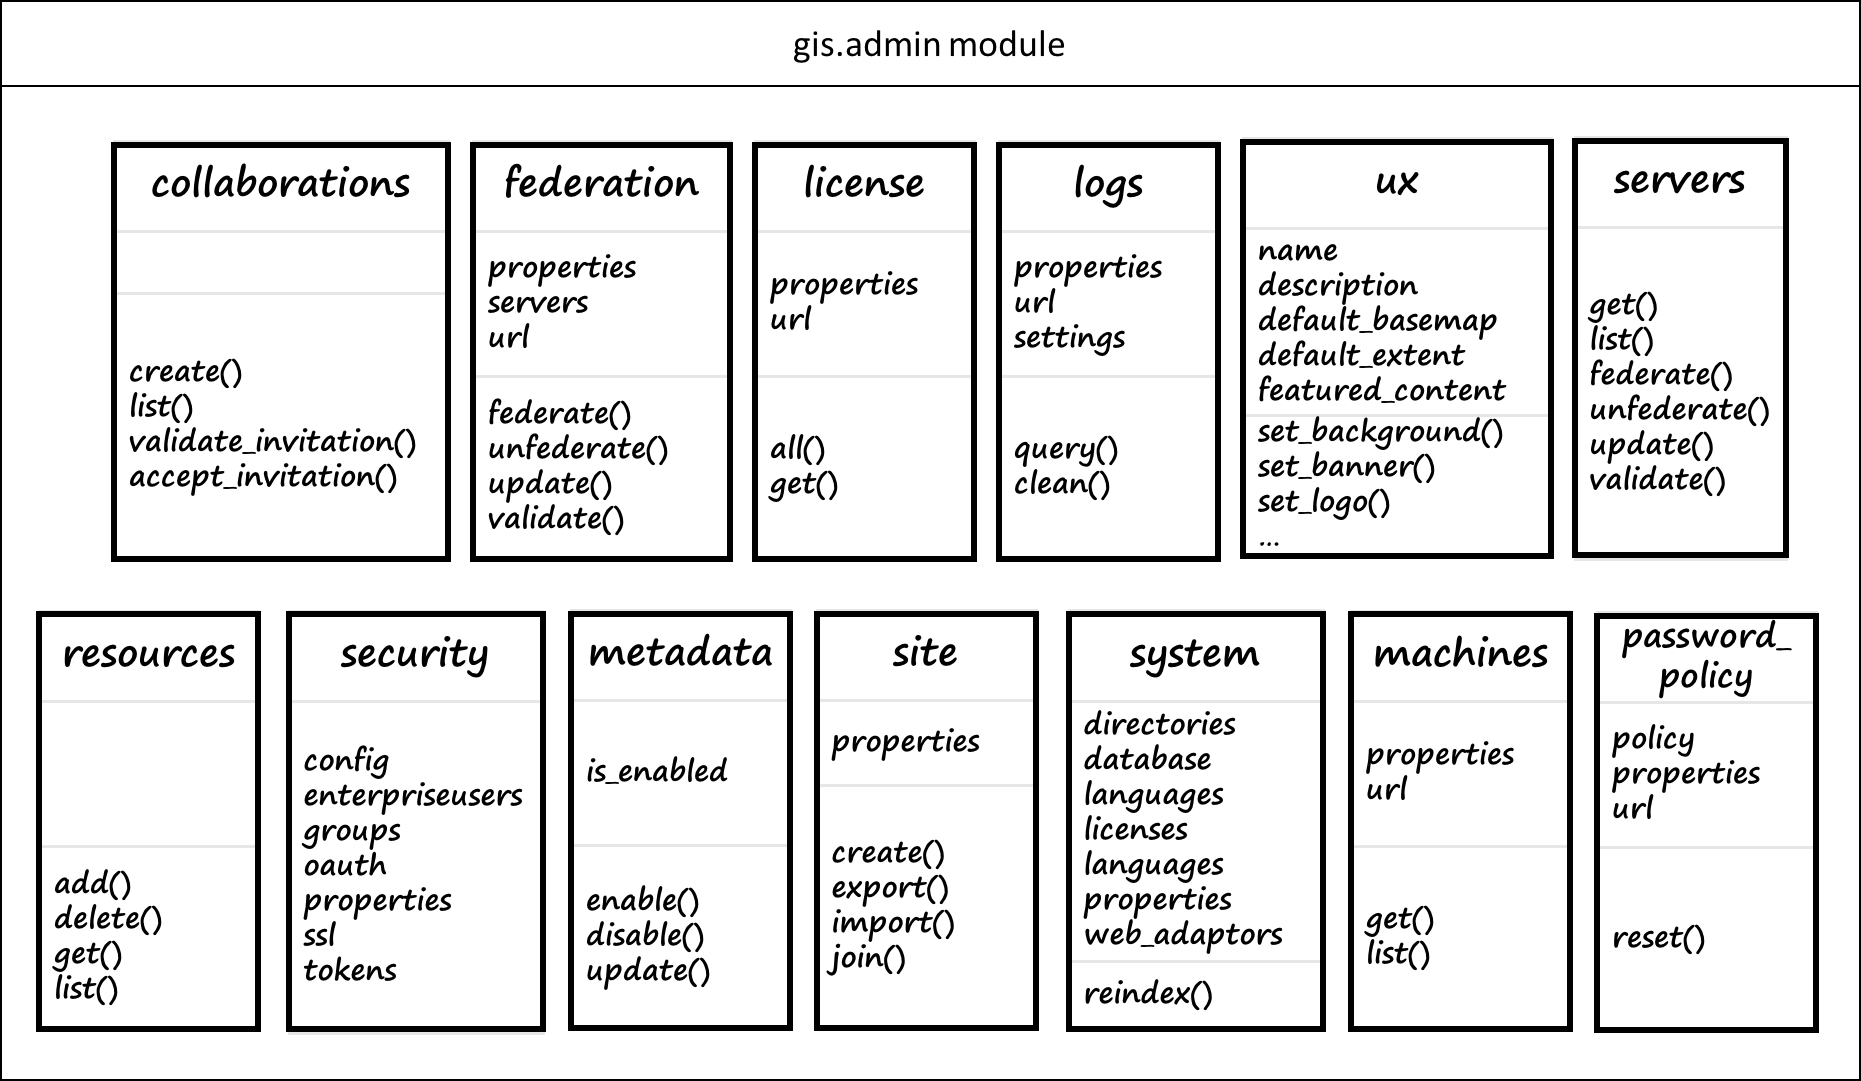

### Portal Administrative Directory Operations

#### Access the Admin API Manager 

In [113]:
# https://developers.arcgis.com/python/api-reference/arcgis.gis.admin.html#portaladminmanager
portaladmin = gis.admin

#### Access Licenses

In [114]:
license = portaladmin.license
license.all()

[<ArcGIS Insights License at https://pythonapi.playground.esri.com/portal/sharing/rest/>,
 <ArcGIS Tracker License at https://pythonapi.playground.esri.com/portal/sharing/rest/>,
 <ArcGIS Drone2Map License at https://pythonapi.playground.esri.com/portal/sharing/rest/>,
 <ArcGIS Workflow Manager License at https://pythonapi.playground.esri.com/portal/sharing/rest/>,
 <ArcGIS Maps for Power BI License at https://pythonapi.playground.esri.com/portal/sharing/rest/>,
 <ArcGIS Navigator License at https://pythonapi.playground.esri.com/portal/sharing/rest/>,
 <ArcGIS Business Analyst Web and Mobile Apps License at https://pythonapi.playground.esri.com/portal/sharing/rest/>,
 <Runtime Analysis License at https://pythonapi.playground.esri.com/portal/sharing/rest/>,
 <ArcGIS Survey123 License at https://pythonapi.playground.esri.com/portal/sharing/rest/>,
 <ArcGIS Workforce License at https://pythonapi.playground.esri.com/portal/sharing/rest/>,
 <ArcGIS Parcel Fabric License at https://pythonapi

In [115]:
pro_license = license.get('ArcGIS Pro')
pro_license.report

,Entitlement,Total,Assigned,Remaining
0,desktopStdN,200,0,200
1,desktopAdvN,200,1,199
2,desktopBasicN,200,0,200
3,smpJapanN,200,0,200
4,LocRefDesktopN,200,0,200
5,dataInteropN,200,0,200
6,smpAsiaPacificN,200,0,200
7,businessBasicN,200,0,200
8,locateXTN,200,0,200
9,workflowMgrN,200,0,200


#### Logs

In [116]:
logsettings = portaladmin.logs.settings
logsettings

{'logDir': '/gisdata/arcgisportal/logs/',
 'logLevel': 'INFO',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 90,
 'usageMeteringEnabled': False}

In [117]:
logsettings['logLevel'] = 'DEBUG'
portaladmin.logs.settings = logsettings

In [118]:
portaladmin.logs.settings

{'logDir': '/gisdata/arcgisportal/logs/',
 'logLevel': 'DEBUG',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 90,
 'usageMeteringEnabled': False}

In [119]:
logsettings['logLevel'] = 'INFO'
portaladmin.logs.settings = logsettings
portaladmin.logs.settings

{'logDir': '/gisdata/arcgisportal/logs/',
 'logLevel': 'INFO',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 90,
 'usageMeteringEnabled': False}

#### Query Portal Logs

In [124]:
import datetime
import pandas as pd
results = portaladmin.logs.query(start_time=datetime.datetime.now() - datetime.timedelta(days=10))

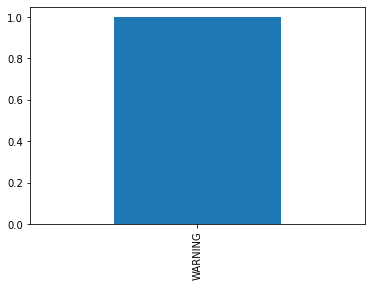

In [125]:
%matplotlib inline
df = pd.DataFrame(results['logMessages'])
df.type.value_counts().plot.bar()

In [126]:
df.head()

,type,message,time,source,machine,user,code,elapsed,process,thread,methodName,requestID
0,WARNING,All logs deleted.,1613478338768,Portal Admin,172.31.29.237,,207024,,25438,1,,


#### Clean Logs

In [123]:
portaladmin.logs.clean()

True

#### Inspecting Portal Machine Status

In [127]:
machines = portaladmin.machines
machines

<Machines at https://pythonapi.playground.esri.com/portal/portaladmin/machines>

In [128]:
machines.list()

[<Machine at https://pythonapi.playground.esri.com/portal/portaladmin/machines>]

#### Is the Machine Status healthy?

In [129]:
machine = machines.list()[0]
print(machine.properties['machineName'])
machine.status()

172.31.29.237


True

#### Import a Trusted CA Certificate

In [130]:
sslmgr = portaladmin.security.ssl

In [132]:
sslcerts = sslmgr.list()
# For each certificate, print its alias and issuer
for sslcert in sslcerts:
    print("{} : {}".format(dict(sslcert)['aliasName'], dict(sslcert)['issuer']))

portal : CN=172.31.29.237, OU=Self Signed Certificate
samlcert : CN=172.31.29.237, OU=Self Signed Certificate


In [133]:
ssl = sslmgr.get('portal')
## Print out SSL certificate
ssl.properties

{
  "aliasName": "portal",
  "entryType": "PrivateKeyEntry",
  "issuer": "CN=172.31.29.237, OU=Self Signed Certificate",
  "subject": "CN=172.31.29.237, OU=Self Signed Certificate",
  "subjectAlternativeNames": [
    "IPAddress: 172.31.29.237"
  ],
  "validFrom": "Sat Feb 24 20:55:08 UTC 2018",
  "validUntil": "Mon Jan 02 20:55:08 UTC 2051",
  "keyAlgorithm": "RSA",
  "keySize": 2048,
  "serialNumber": "4e80eb42",
  "version": 3,
  "signatureAlgorithm": "SHA256withRSA",
  "keyUsage": [],
  "md5Fingerprint": "a3905b297d3b31080a64833fcf205dda",
  "sha1Fingerprint": "b1e1d551c701dbb2011b290ed5bf9ad2de653369",
  "sha256Fingerprint": "64a351e6b94f295358b29dc79fc848edec692cf6f061b07d2cb66b345d1a70ce"
}

In [135]:
resp = sslmgr.import_certificate(r'/arcgis/home/DigiCertCA.crt', 'DigiCertCA2', norestart=True)

In [136]:
ssl = sslmgr.get('DigiCertCA2')
## Print out SSL certificate
ssl.properties

{
  "aliasName": "digicertca2",
  "entryType": "trustedCertEntry",
  "issuer": "CN=DigiCert High Assurance EV Root CA, OU=www.digicert.com, O=DigiCert Inc, C=US",
  "subject": "CN=DigiCert SHA2 High Assurance Server CA, OU=www.digicert.com, O=DigiCert Inc, C=US",
  "subjectAlternativeNames": [],
  "validFrom": "Tue Oct 22 12:00:00 UTC 2013",
  "validUntil": "Sun Oct 22 12:00:00 UTC 2028",
  "keyAlgorithm": "RSA",
  "keySize": 2048,
  "serialNumber": "4e1e7a4dc5cf2f36dc02b42b85d159f",
  "version": 3,
  "signatureAlgorithm": "SHA256withRSA",
  "keyUsage": [
    "Digital_Signature",
    "Key_Cert_Sign",
    "CRL_Sign"
  ],
  "md5Fingerprint": "aaee5cf8b0d8596d2e0cbe67421cf7db",
  "sha1Fingerprint": "a031c46782e6e6c662c2c87c76da9aa62ccabd8e",
  "sha256Fingerprint": "19400be5b7a31fb733917700789d2f0a2471c0c9d506c0e504c06c16d7cb17c0"
}

In [106]:
# Delete an SSL Certificate
ssl.delete()

False

#### System Manager

In [137]:
sysmgr = portaladmin.system

#### System Properties

In [138]:
sysmgr.properties

{'WebContextURL': 'https://pythonapi.playground.esri.com/portal',
 'privatePortalURL': 'https://pythonapi.playground.esri.com/portal',
 'disableSignup': True}

#### Configurating Email Manager and Sending Test Email

In [139]:
emailmgr = sysmgr.email

In [140]:
newproperties = {"smtpServer":"smtp.mail.com",
                 "fromEmailAddress": "test.esri.com",
                 "fromEmailAddressLabel": "Demo",
                 "authRequired": "no",
                 "smtpPort" : 25,
                 "encryptionMethod": "None"}

In [141]:
emailmgr.update("smtp.mail.com", "demo@esri.com", False)

True

In [ ]:
emailmgr.test("user@esri.com")

In [143]:
emailmgr.delete()

True

#### Re-indexing
* Sometimes artifacts remain after deleting items
* Forcing re-indexing can solved that problem

In [144]:
sysmgr.index_status

{'indexes': [{'name': 'users', 'databaseCount': 68, 'indexCount': 68},
  {'name': 'groups', 'databaseCount': 441, 'indexCount': 441},
  {'name': 'search', 'databaseCount': 21471, 'indexCount': 21471}],
 'syncStatus': True}

In [ ]:
## This could take a while
resp = sysmgr.reindex(mode="SEARCH_MODE")

## ArcGIS Server Admin API

#### Managing Federated Servers

In [145]:
servers = gis.admin.servers
## Server Manager
servers

<ServerManager at https://pythonapi.playground.esri.com/portal/portaladmin>

In [146]:
s = servers.list()
s

[<Server at https://pythonapi.playground.esri.com/server/admin>,
 <Server at https://pythonapi.playground.esri.com/ra/admin>,
 <Server at https://pythonapi.playground.esri.com/ga/admin>]

#### Validate all Servers to make sure things are working properly

In [147]:
servers.validate()

True

#### Manage a single server

In [148]:
server = s[0]
server

<Server at https://pythonapi.playground.esri.com/server/admin>

In [149]:
server.properties

{
  "isServerLicensed": "true",
  "resources": [
    "machines",
    "clusters",
    "system",
    "services",
    "security",
    "data",
    "uploads",
    "logs",
    "mode",
    "usagereports",
    "webhooks"
  ],
  "currentVersion": 10.81,
  "fullVersion": "10.8.1",
  "acceptLanguage": null
}

#### Changing Log Settings

In [150]:
logs = server.logs
logs

<LogManager at https://pythonapi.playground.esri.com/server/admin/logs>

In [152]:
logs.settings

{'logDir': '/arcgis/server/usr/logs/',
 'logLevel': 'WARNING',
 'maxErrorReportsCount': 10,
 'maxLogFileAge': 90,
 'usageMeteringEnabled': False,
 'statisticsConfig': {'enabled': True,
  'samplingInterval': 30,
  'maxHistory': 0,
  'statisticsDir': '/gisdata/arcgisserver/directories/arcgissystem'}}

In [153]:
logs.edit(level="INFO")

{'status': 'success',
 'settings': {'logDir': '/arcgis/server/usr/logs/',
  'logLevel': 'INFO',
  'maxErrorReportsCount': 10,
  'maxLogFileAge': 90,
  'usageMeteringEnabled': False,
  'statisticsConfig': {'enabled': True,
   'samplingInterval': 30,
   'maxHistory': 0,
   'statisticsDir': '/gisdata/arcgisserver/directories/arcgissystem'}}}

In [154]:
logs.edit(level="WARNING")

{'status': 'success',
 'settings': {'logDir': '/arcgis/server/usr/logs/',
  'logLevel': 'WARNING',
  'maxErrorReportsCount': 10,
  'maxLogFileAge': 90,
  'usageMeteringEnabled': False,
  'statisticsConfig': {'enabled': True,
   'samplingInterval': 30,
   'maxHistory': 0,
   'statisticsDir': '/gisdata/arcgisserver/directories/arcgissystem'}}}

### Managing Services
* Access service management from services property
* Provides the ability start,stop, delete, and modify services
* Useful for scripting daily or weekly service management

In [155]:
# Create a folder
server.services.create_folder("crime_analysis")

True

In [156]:
# Delete a folder
server.services.delete_folder('crime_analysis')

True

#### Services Manager Class

In [157]:
services = server.services
services

<ServiceManager at https://pythonapi.playground.esri.com/server/admin/services>

In [159]:
# Check if a service exists
services.exists(folder_name='Hosted', name='asdfas', service_type='FeatureServer')

False

In [ ]:
for folder in services.folders:
    for s in services.list(folder):
        print(s)

In [161]:
for service in services.list():
    if service.properties.serviceName == 'SampleWorldCities':
        break
service

<Service at https://pythonapi.playground.esri.com/server/admin/services/SampleWorldCities.MapServer>

In [162]:
service.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

In [163]:
service.stop()

True

In [164]:
service.status

{'configuredState': 'STOPPED', 'realTimeState': 'STOPPED'}

In [165]:
service.start()

True

In [166]:
service.status

{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}

#### Modifying Map Service Capabilities

In [167]:
service.extensions

In [168]:
for e in service.extensions:
    print(e)

{"typeName": "WMSServer", "capabilities": "GetCapabilities,GetFeatureInfo,GetLegendGraphic,GetMap,GetSchemaExtension,GetStyles", "enabled": true, "maxUploadFileSize": 0, "allowedUploadFileTypes": "", "properties": {"name": "SampleWorldCities", "title": "WMS"}}
{"typeName": "KmlServer", "capabilities": "SingleImage,SeparateImages,Vectors", "enabled": true, "maxUploadFileSize": 0, "allowedUploadFileTypes": "", "properties": {"compatibilityMode": "GoogleEarth", "useDefaultSnippets": "true", "featureLimit": "1000000", "minRefreshPeriod": "30", "imageSize": "1024", "dpi": "96"}}
{"typeName": "FeatureServer", "capabilities": "Create,Query,Update,Delete,Uploads", "enabled": false, "maxUploadFileSize": 0, "allowedUploadFileTypes": "", "properties": {}}


In [169]:
# Changing Extension Properties causing the Service to restart
for ext in service.extensions:
    if ext.typeName == "KmlServer":
        ext.enabled = True
[(ext.typeName, ext.enabled) for ext in service.extensions]

[('WMSServer', True), ('KmlServer', True), ('FeatureServer', False)]

In [170]:
# Changing Extension Properties causing the Service to restart
for ext in service.extensions:
    if ext.typeName == "KmlServer":
        ext.enabled = False
[(ext.typeName, ext.enabled) for ext in service.extensions]

[('WMSServer', True), ('KmlServer', False), ('FeatureServer', False)]

#### Querying Server Logs

In [ ]:
import datetime
import pandas as pd
now = datetime.datetime.now()
start_time = now - datetime.timedelta(days=10)
start_time
recent_logs = logs.query(start_time = start_time)

#print a message as a sample
recent_logs['logMessages']

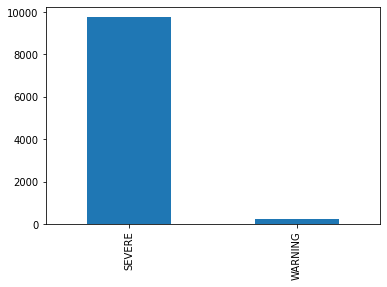

In [173]:
%matplotlib inline
df = pd.DataFrame(recent_logs['logMessages'])
df.type.value_counts().plot.bar()

#### Monitoring Server Usage
ArcGIS Server records various service statistics, such as total requests, average response time and timeouts. Administrators and publishers can use this information to monitor service activity to better understand how clients are using services. For example, monitoring server statistics help you answer questions such as:

* What is the total number of requests that my ArcGIS Server site handled during the past week?
* How was the service request load distributed during the past month?
* How are my services performing on an hourly basis?
* What was the maximum number of service instances used at any given time for a particular service?

In [174]:
usage = server.usage
usage

<ReportManager at https://pythonapi.playground.esri.com/server/admin/usagereports>

#### Using Built-in Reports

In [175]:
reports = usage.list()
reports

[<Report at https://pythonapi.playground.esri.com/server/admin/usagereports/1599560245856>,
 <Report at https://pythonapi.playground.esri.com/server/admin/usagereports/Total%20requests%20for%20the%20last%207%20days>,
 <Report at https://pythonapi.playground.esri.com/server/admin/usagereports/Max%20response%20times%20for%20the%20last%207%20days>,
 <Report at https://pythonapi.playground.esri.com/server/admin/usagereports/Timed-out%20requests%20for%20the%20last%207%20days>,
 <Report at https://pythonapi.playground.esri.com/server/admin/usagereports/2c89996fa63c429f84829a0448c10c13>,
 <Report at https://pythonapi.playground.esri.com/server/admin/usagereports/63beb007b013404a93815ee010725b1c>,
 <Report at https://pythonapi.playground.esri.com/server/admin/usagereports/1599247234333>,
 <Report at https://pythonapi.playground.esri.com/server/admin/usagereports/awesomereport>]

In [176]:
for r in reports:
    print(r.properties['reportname'])

1599560245856
Total requests for the last 7 days
Max response times for the last 7 days
Timed-out requests for the last 7 days
2c89996fa63c429f84829a0448c10c13
63beb007b013404a93815ee010725b1c
1599247234333
awesomereport


#### Querying maximum response times for the last 7 days

In [177]:
data = reports[2].query()

In [178]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

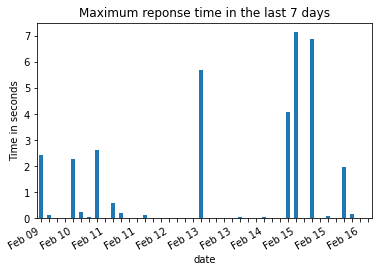

In [179]:
#store reponse times in Y axis
data_y = data['report']['report-data'][0][0]['data']

#convert dates to readable dates and store in X axis
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]

df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 

ax = df['count'].plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_title('Maximum reponse time in the last 7 days')
ax.set_ylabel('Time in seconds')
plt.gcf().autofmt_xdate()
plt.show()

#### Creating Quick Reports
* On the fly reporting
* Data is not saved

#### Metrics Available

* RequestCount - the number of requests received
* RequestsFailed - the number of requests that failed
* RequestsTimedOut - the number of requests that timed out
* RequestMaxResponseTime - the maximum response time
* RequestAvgResponseTime - the average response time
* ServiceActiveInstances - the maximum number of active (running) service instances sampled at 1 minute intervals, for a specified service

In [180]:
data = usage.quick_report(since="LAST_MONTH", metrics="RequestCount")
data.keys()

dict_keys(['report'])

In [181]:
type(data['report']['report-data']), len(data['report']['time-slices'])

(list, 30)

In [182]:
import pandas as pd
data_flat = {
    #'report_data' : data['report']['report-data'],
    'time_slices' : data['report']['time-slices']
}
for d in data['report']['report-data'][0]:
    data_flat[d['metric-type']] = d['data']

In [183]:
pd.DataFrame(data_flat).tail()

,time_slices,RequestCount
25,1613133000000,38116
26,1613219400000,35987
27,1613305800000,34891
28,1613392200000,9544
29,1613478600000,455


### Scheduling Admininstrative Operations??
* How could I schedule a Notebook with various operations to run daily or weekly?
* Generate a daily Log report of SERVERE and WARNING messages for analysis
* Weekly recycling of Map Services
* Daily report of new user content
* Weekly report that checks on Portal Index Status and if not in sync, reindex